### Data processing - tests

Here, I do some initial data processing and analysis. I get a good look at the data, count the number of features and samples, generate historgrams, etc.

In [1]:
import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt
from collections import Counter

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier



In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

In [3]:
#reader = csv.reader(open("datasets/miRNA_counts.csv","r"), delimiter=",")
#x = list(reader)
#csvdata_RNA = np.array(x)
#print(csvdata_RNA)

#reader2 = csv.reader(open("datasets/clinical.csv","r"), delimiter=",")
#x = list(reader2)
#csvdata_clinical = np.array(x)
#print(csvdata_clinical)

In [4]:
#import the data into pandas dataframes
df_clinical = pd.read_csv("datasets/clinical.csv") 
#print(df_clinical)
df_RNA = pd.read_csv("datasets/miRNA_counts.csv") 
#print(df_RNA)

In [5]:
print(df_RNA.shape)
print(df_clinical.shape)

(2501, 1882)
(2258, 18)


In [6]:
#df_RNA_sorted = df_RNA.sort_values(by=['patient_id'])
#df_clinical_sorted = df_clinical.sort_values(by=['patient_id'])

#print(df_RNA_sorted)
#print(df_clinical_sorted)

In [7]:
#merge the two dataframes on the patient id. one of the sets has slightly more patients, so that will get cut
merged_inner = pd.merge(left=df_clinical,right=df_RNA, left_on='patient_id', right_on='patient_id')


In [8]:
#print(merged_inner.shape)
#print(merged_inner)

print(merged_inner.columns)
print(merged_inner.shape)
print(merged_inner['cancer'])

Index(['patient_id', 'cancer', 'gender', 'year_of_birth', 'race',
       'vital_status', 'ethnicity', 'year_of_diagnosis', 'primary_diagnosis',
       'tumor_stage',
       ...
       'hsa-mir-941-5', 'hsa-mir-942', 'hsa-mir-943', 'hsa-mir-944',
       'hsa-mir-95', 'hsa-mir-9500', 'hsa-mir-96', 'hsa-mir-98', 'hsa-mir-99a',
       'hsa-mir-99b'],
      dtype='object', length=1899)
(2501, 1899)
0             lung
1             lung
2       colorectal
3           kidney
4             lung
           ...    
2496          lung
2497          lung
2498          lung
2499    colorectal
2500    colorectal
Name: cancer, Length: 2501, dtype: object


columns that are not the DNA ones:

'cancer',

       'gender', 'year_of_birth', 'race', 'vital_status', 'ethnicity',
       'year_of_diagnosis', 'primary_diagnosis', 'tumor_stage',
       'age_at_diagnosis', 'prior_treatment', 'tissue_or_organ_of_origin',
       'prior_malignancy', 'ajcc_pathologic_stage',
       'site_of_resection_or_biopsy', 'treatment_type',
       'treatment_or_therapy'],

In [9]:
#get the target values out
#remove the clinical data. we just used the clinical data to match the patient ids and remove stragglers 
#drop the patient id as well

#the RNA data
total_data = merged_inner.drop(['patient_id','gender', 'year_of_birth', 'race', 'vital_status', 'ethnicity',
                   'year_of_diagnosis', 'primary_diagnosis', 'tumor_stage',
                   'age_at_diagnosis', 'prior_treatment', 'tissue_or_organ_of_origin',
                   'prior_malignancy', 'ajcc_pathologic_stage',
                   'site_of_resection_or_biopsy', 'treatment_type',
                   'treatment_or_therapy'], axis=1)

# shuffle the data for future machine learning
shuffled = total_data.sample(frac=1)

# The frac keyword argument specifies the fraction of rows to return in the random sample,
# so frac=1 means return all rows (in random order)

y_data = shuffled['cancer']

x_data = shuffled.drop('cancer',axis=1)
#x_data_2 = x_data.drop_duplicates()
#no duplicate rows

print(total_data.shape)
print(x_data.shape)
print(x_data)
print(y_data)


(2501, 1882)
(2501, 1881)
      hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3    hsa-let-7b   hsa-let-7c  \
1699   5644.228090   5693.831865   5630.217863  20197.824400  2247.694750   
1684   5599.420349   5634.479896   5705.546547   6446.534822  1724.550717   
624   12548.951750  12525.601890  12624.162880   8647.067368  2338.918538   
283    8457.517145   8409.682733   8458.172411  19303.478550  1121.159978   
216    5030.022020   5100.294071   5152.569622  17370.051340  2923.574431   
...            ...           ...           ...           ...          ...   
746   31083.593530  31037.075850  31023.949580  17606.248840  3485.256143   
986    5177.510990   5107.733214   5166.493446   4520.865391  1326.512250   
862    6378.212562   6375.336773   6387.558876   6543.282854   108.129669   
170    4796.924878   4790.658168   4733.775731  13646.482400   768.394961   
2075   7004.434336   6838.787961   6981.794088   6167.891485  6395.440311   

       hsa-let-7d   hsa-let-7e  hsa-let-7f-1  hsa

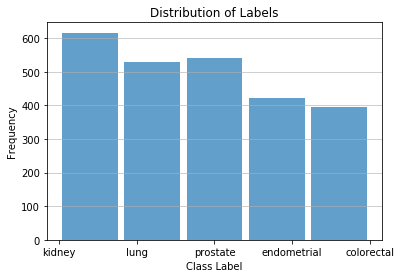

In [32]:
#some data description

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=list(y_data), bins=5, alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

In [11]:
total_data.describe()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,...,2501.0,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000
mean,9362.656356,9339.147098,9391.025614,14035.104474,2723.291197,632.427550,1081.899556,4417.638389,4496.711337,733.491475,...,0.0,6.414763,0.058231,1.762493,5.763132,0.000046,26.215842,56.492852,954.299238,28928.672379
std,5210.472119,5202.677599,5214.379305,12797.740681,3025.359399,1059.173756,737.291346,3613.693735,3665.841311,483.242114,...,0.0,7.833771,0.182771,7.224067,9.109726,0.002307,28.747268,32.203187,1206.765470,23987.764694
min,638.684976,611.066167,677.811624,967.052796,26.087161,57.254019,63.011514,164.532772,144.909598,64.443890,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.550908,2983.982241
25%,5868.448251,5858.691471,5892.426528,7631.250282,732.511142,339.754747,597.101113,1858.508755,1882.292968,425.160113,...,0.0,1.867476,0.000000,0.000000,1.215203,0.000000,5.991132,34.092717,198.285377,14518.720070
50%,8273.104260,8228.808230,8285.363193,11227.893010,1758.587041,504.429586,882.100238,3351.662038,3432.367879,589.982099,...,0.0,3.778896,0.000000,0.498088,2.701483,0.000000,17.686116,49.708241,514.431582,22751.102040
75%,11354.113180,11373.539780,11415.554820,16774.517180,3634.567997,697.391471,1356.141862,5593.364481,5717.406996,871.685035,...,0.0,8.184659,0.000000,1.497276,5.951144,0.000000,36.762461,70.755153,1166.299068,36695.824920
max,42087.709430,41971.986040,42008.582320,262062.156100,35401.590430,29889.884800,6937.517997,28259.146810,28530.684210,4619.107481,...,0.0,112.193668,2.470243,200.669591,124.813990,0.115379,259.023662,319.236745,10548.036760,332951.729600


In [12]:
class_names = list(set(y_data))
print(class_names)

['kidney', 'prostate', 'colorectal', 'lung', 'endometrial']


---
#### According to the website, they suggested:

Try n-dimensional vector matching
Try Bayesian networks


Final output needed:

* Best 3 Cancer Matches: The system has to state which 3 cancer types match best with the sample and rank them based on a quantified matching metric.

For each disease match:
- Relative Positive Predictive Value (PPV): The positive predictive value (the probability that this sample has the specified disease) based on the empirical data set
- Absolute Positive Predictive Value: The positive predictive value based on the relative predictive value and the disease prevalence in the population (you have to google that prevalence and disclose what you found and what prevalence you assume for each disease)
- Multiple over average risk: The probability that this sample has the specified disease expressed as a multiple over the average risk population (This is easy: if someone has a 4% PPV, and the PPV without a test for an average person is 0.1%, this sample has a 40x elevated risk.)

To test, they suggest leave one out method:
Take each sample from the dataset and run it as a new sample. (Remove it from the dataset and run it against the empirical base.)

---

useful to know
https://stackoverflow.com/questions/47144832/sklearn-predict-each-classs-probability


Performance of the system
To test performance, do the following:
- Take each sample from the dataset and run it as a new sample. (Remove it from the dataset and run it against the empirical base.)
- Score how many times the #1 diagnosed disease for each sample matches its true clinical label by this definition.
- Score how many times the #1 or #2 diagnosed disease for each sample matches its true clinical label, and provide the total % of samples that were correctly diagnosed by this definition.
- Score how many times the #1,#2 or #3 diagnosed disease for each sample matches its true clinical label, and provide the total % of samples that were correctly diagnosed by this definition.

In [13]:
#just some data on the percentages are of each cancer in the dataset

counts = Counter(y_data)
#print(counts)
total_len = len(y_data)
#print(total_len)

print("PPV for each kind of cancer in our dataset")

kidney_PPV = counts['kidney'] / (total_len)
print("kidney\t\t%s" % kidney_PPV)
prostate_PPV = counts['prostate'] / (total_len)
print("prostate\t%s" % prostate_PPV)
lung_PPV = counts['lung'] / (total_len - counts['lung'])
print("lung\t\t%s" % lung_PPV)
endometrial_PPV = counts['endometrial'] / (total_len)
print("endometrial\t%s" % endometrial_PPV)
colorectal_PPV = counts['colorectal'] / (total_len)
print("colorectal\t%s" % colorectal_PPV)

PPV for each kind of cancer in our dataset
kidney		0.2463014794082367
prostate	0.21591363454618154
lung		0.267612772427775
endometrial	0.16913234706117553
colorectal	0.15753698520591763


https://gis.cdc.gov/Cancer/USCS/DataViz.html

According to the CDC, in 2016, the new cancer rates (in percentage of total number of cases of all cancers listed, not just the ones we are researching) for the cancers we are researching are as follows:

- Prostate:	16.17452141
- Lung and Bronchus:	18.3417928
- Colon and Rectum:	11.87351392
- Corpus and Uterus NOS:	4.77462008
- Kidney and Renal Pelvis:	5.348754529

| Cancer Type | New Cancer Rate (%)|
|------|------|
|   Prostate  | 16.17|
|   Lung and Bronchus  | 18.34|
|   Colon and Rectum  | 11.87|
|   Corpus and Uterus NOS  | 4.77|
|   Kidney and Renal Pelvis  | 5.35|

To calculate these, I used the number of cases for each cancer divided by the total number of cases reported for all cancers combines.

The percentage of just the ones we are researching:

28.6207835
32.45576593
21.0101593
8.448680749
9.464610516

| Cancer Type | New Cancer Rate (% of ones we are researching)|
|------|------|
|   Prostate  | 28.62|
|   Lung and Bronchus  | 32.46|
|   Colon and Rectum  | 21.01|
|   Corpus and Uterus NOS  | 8.45|
|   Kidney and Renal Pelvis  | 9.46|

## Apparently the data they supplied isn't what they originally were gonna supply. so we ignore the PPV stuff !! just give sensitivity (aka accuracy) 